<a href="https://colab.research.google.com/github/Satya-Prakash009/EDA-playstore-project/blob/main/EDA_Project_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>
 
## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>
 
## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Google Play Store apps and reviews
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [25]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
 
path = '/content/drive/MyDrive/Colab Notebooks/Data for class/PlayStoreData.csv'
play_df = pd.read_csv(path)
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_df.head()

In [ ]:
play_df.tail()

In [26]:
play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


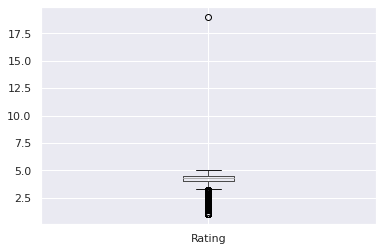

In [27]:
#boxplot to see if any outliers
play_df.boxplot()


In [28]:
#finding sum of missing values in dataset
play_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**2. Data cleaning**
The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [29]:
# checking for rating more than 5
play_df[play_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
#removing the row
play_df.drop([10472], inplace=True)

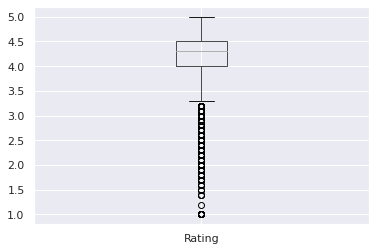

In [31]:
# boxplot to check rating column ok
play_df.boxplot()

In [ ]:
# if rating column has Nan values, it is replaced by mean value
play_df.fillna(value=play_df['Rating'].median(), inplace=True)

varies with device ko category ka median value of category... code

In [ ]:
+# if size column has string values, that row is to be deleted

play_df = play_df[play_df["Size"].str.contains("Varies with device")==False]

In [ ]:
# if Installs column has string values, that row is to be deleted

play_df= play_df[play_df["Installs"].str.contains("Free")==False]
print(play_df)

In [ ]:
# every 'k' in size to be should be removed and "*0.001" needs to be done
for play_df["Size"].str.contains("k"):
  play_df["Size"] =*0.001

In [ ]:
# REMOVE ALL SPECIAL CHARACTERS 
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        play_df[col] = play_df[col].replace(char, ' ')
     
play_df.head(10)

In [ ]:
# Convert col to numeric
for col in cols_to_clean:
  play_df[col] = pd.to_numeric(play_df[col])

In [ ]:
# if genre more than one,only one to be kept, rest discarded


In [ ]:
# all "and up" from version to be removed